<style>
pre, code {
    white-space: pre-wrap !important;
    word-break: break-word !important;
}
</style>

## **Practical 7** : Estimation - MLE, Confidence Interval & Bootstrapping
##### **Name :** $Deepak$ $Kumar$ $Bharti$
##### **Roll No. :** $25056765013$
##### **Group :** $A$
---

#### **Given Data**
###### **Lifetimes (in hours) :**
###### 12.4, 10.8, 11.6, 13.1, 12.9, 11.3, 12.0, 10.9, 11.8, 12.5
######  Assume lifetimesfollow a **Normal distribution** i.e. $ X \sim N(\mu, \sigma^2) $
---

###### 1. Obtain **MLEs** of $\mu$ and $\sigma^2$.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Given lifetimes data (in hours)
lifetimes = np.array([12.4, 10.8, 11.6, 13.1, 12.9, 11.3, 12.0, 10.9, 11.8, 12.5])
n = len(lifetimes)

# MLE of mean (mu)
mu_mle = np.mean(lifetimes)

# MLE of variance (sigma^2)
sigma2_mle = np.mean((lifetimes - mu_mle) ** 2)

print("MLE of Mean (μ̂ ) :", mu_mle)
print(f"MLE of Variance (σ̂²) : {sigma2_mle:.4f}")
print(f"MLE of Standard Deviation (σ̂) : {np.sqrt(sigma2_mle):.4f}")

MLE of Mean (μ̂ ) : 11.93
MLE of Variance (σ̂²) : 0.5721
MLE of Standard Deviation (σ̂) : 0.7564


---

###### 2. Construct a **95% Confidence Interval** for μ.

In [3]:
# Sample standard deviation (unbiased)
s = np.std(lifetimes, ddof=1)

# t critical value
t_critical = stats.t.ppf(0.975, df=n-1)

# Margin of error
margin_error = t_critical * (s / np.sqrt(n))

# Confidence interval
ci_lower = mu_mle - margin_error
ci_upper = mu_mle + margin_error

print("95% Confidence Interval for μ:")
print("Lower Limit:", round(ci_lower, 4))
print("Upper Limit:", round(ci_upper, 4))

95% Confidence Interval for μ:
Lower Limit: 11.3597
Upper Limit: 12.5003


---

###### 3. Use **bootstrap resampling (1,000 samples)** to estimate the standard error.

In [4]:
# Number of bootstrap samples
B = 1000

# Store bootstrap means
bootstrap_means = np.zeros(B)

np.random.seed(42)  # for reproducibility

for i in range(B):
    bootstrap_sample = np.random.choice(lifetimes, size=n, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Bootstrap standard error
bootstrap_se = np.std(bootstrap_means, ddof=1)

print("Bootstrap Standard Error of Mean:", round(bootstrap_se, 5))

Bootstrap Standard Error of Mean: 0.24501


---

###### 4. Compare bootstrap and theoretical standard errors.

In [5]:
# Theoretical standard error
theoretical_se = s / np.sqrt(n)

print("Theoretical Standard Error:", round(theoretical_se,4))
print("Bootstrap Standard Error:", round(bootstrap_se,5))

Theoretical Standard Error: 0.2521
Bootstrap Standard Error: 0.24501


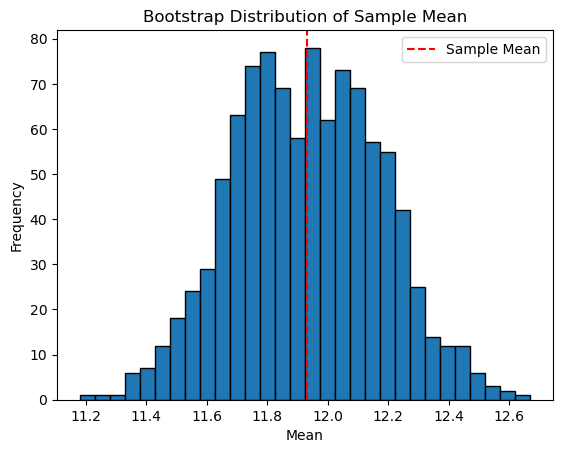

In [6]:
plt.hist(bootstrap_means, bins=30, edgecolor='black')
plt.axvline(mu_mle, color='red', linestyle='--', label='Sample Mean')
plt.title("Bootstrap Distribution of Sample Mean")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

---

###### 5. Comment on advantages of bootstrapping.

In [7]:
print("""Advantages of Bootstrapping:
1. Does not require strong distributional assumptions.
2. Works well for small sample sizes.
3. Easy to implement using resampling.
4. Can estimate standard errors, bias, and confidence intervals.
5. Useful when theoretical formulas are complex or unavailable.
""")

Advantages of Bootstrapping:
1. Does not require strong distributional assumptions.
2. Works well for small sample sizes.
3. Easy to implement using resampling.
4. Can estimate standard errors, bias, and confidence intervals.
5. Useful when theoretical formulas are complex or unavailable.

